In [356]:
# Import Packages
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)  
#pd.set_option('display.expand_frame_repr', False)
#pd.set_option('max_colwidth', -1)

In [357]:
# Define output path. Create the output folder if it does not exisit 
output_path = 'output/models/'

import os
if not os.path.exists(output_path):
    os.makedirs(output_path)

In [358]:
# Import prospective dataset
df= pd.read_excel('H:/RediMinds/DRMahen/Preethi PN_Data validation_2014-2018.xlsx', sheet_name='PN_Data validation_2014-2018')

In [359]:
# import patient list
f = open("../Preoperative Prediction/output/models/patient_list.txt", "r")

In [360]:
# create aptient list
patient_list = f.read().splitlines()
f.close()

In [361]:
df = df[df['PATIENTNUMBER'].isin(patient_list)].copy()

In [362]:
# Exploring outcome of intrest
print("Unique values for tumour type {}".format(df['PATHOLOGY'].unique()))
print("Number of patients with tumour type missing {}".format(sum(df['PATHOLOGY'].isnull())))
print("Distribution of tumor type \n{}".format(df['PATHOLOGY'].value_counts()))

Unique values for tumour type ['Malign' 'Benign']
Number of patients with tumour type missing 0
Distribution of tumor type 
Malign    1341
Benign     305
Name: PATHOLOGY, dtype: int64


In [363]:
# drop records with no target variable
df = df[df['PATHOLOGY'].notnull()].copy()

In [364]:
# Encode the target variable
df['PATHOLOGY'] = df['PATHOLOGY'].map({'Benign':1,'Malign':0}).copy()

In [365]:
df_ori = df.copy()

In [366]:
#check number of patients and columns in Retrospective dataset
print('Number of patients in Combined dataset {}'. format(df.shape[0]))
print('Number of variables in Combined dataset {}'. format(df.shape[1]))

Number of patients in Combined dataset 1646
Number of variables in Combined dataset 161


In [367]:
# reset index for combined dataset
df.reset_index(inplace=True, drop=True)

In [368]:
df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646 entries, 0 to 1645
Data columns (total 161 columns):
PATIENTNUMBER                         1646 non-null object
PROCNAME                              1646 non-null object
CENTERCODE                            1646 non-null object
SURGEONCODE                           679 non-null object
RECPROGRESS                           1646 non-null object
CREATEDDATE                           1646 non-null object
GENDER                                1646 non-null object
DATEOFBIRTH                           1232 non-null float64
AGEATSURGERY                          1644 non-null float64
MARITALSTATUS                         1499 non-null object
RACE                                  1480 non-null object
EDUCATION                             1437 non-null object
WEIGHT                                1512 non-null float64
HEIGHT                                1510 non-null float64
BMI                                   1533 non-null float64
CLI

In [369]:
# Exploring outcome of intrest
print("Unique values for tumour type {}".format(df['PATHOLOGY'].unique()))
print("Number of patients with tumour type missing {}".format(sum(df['PATHOLOGY'].isnull())))
print("Distribution of tumor type \n{} \n{}".format(df['PATHOLOGY'].value_counts(), round(df['PATHOLOGY'].value_counts(normalize=True),2)))

Unique values for tumour type [0 1]
Number of patients with tumour type missing 0
Distribution of tumor type 
0    1341
1     305
Name: PATHOLOGY, dtype: int64 
0    0.81
1    0.19
Name: PATHOLOGY, dtype: float64


### Define numeric columns and identify missing values

In [370]:
# List of columns tobre converted to numeric
numeric_col_list = ['AGEATSURGERY',
'WEIGHT',
'HEIGHT',
'BMI',
'CLINICALSIZEmm',
'PREOPHB',
'PREOPHT',
'PREOPWBC',
'PREOPCREAT',
'PREOPGFR',
'PREOPEGFR',
'PREOPERPF',
'NOOFLESIONS',
'BLOODLOSSml',
'POSTOPHB_Day1',
'POSTOPHT_Day1',
'POSTOPCreat_Day1',
'POSTOPEGFR_Day1',
'POSTOPWBC_Day1',
'POSTOPHB_Day2',
'POSTOPHT_Day2',
'POSTOPCreat_Day2',
'POSTOPEGFR_Day2',
'POSTOPWBC_Day2',
'POSTOPHB_Day3',
'POSTOPHT_Day3',
'POSTOPCreat_Day3',
'POSTOPEGFR_Day3',
'POSTOPWBC_Day3',
'LENGTHOFSTAYdays',
'PATHOLOGICALTUMORSIZE',
'MINTHICKNESSMARGIN',
'MAXTHICKNESSMARGIN',
'SARCOMATOIDDIFF_A',
'NO_OF_NODE_TAKEN',
'LASTFOLLOWUPDURATION',
'CHARLSONSCORE',
'CHARLSONAGEADJUSTSCORE',
'PADUASCORE',
'ISCHEMIATIMEmin',
'OPERATIVETIMEmin'
] 

### Define Categorical columns

In [371]:
cat_col = ['PROCNAME',
'CENTERCODE',
'SURGEONCODE',
'RECPROGRESS',
'GENDER',
'MARITALSTATUS',
'RACE',
'EDUCATION',
'ECOG',
'SYMPTOMS',
'SOLITARYKIDNEY',
'TYPEOFSOLITARYKIDNEY',
'BILATERALITYOFTUMOR',
'SIDEOFTUMOR',
'SIDEOFSURGERY',
'PREOPMULTIFOCALITY',
'FACE',
'TUMORlOCATION',

'PADUARISK',
'POLARLOCATION',
'RIMLOCATION',
'RENALSINUS',
'UCSINVASION',
'EXOPHYTICRATE',
'CLINICALSIZEGROUP',
'CT',
'CN',
'CM',
'R.E.N.A.L.NEPHROSCORE',
'R.E.N.A.L.NEPHRORISKSTRATIFICATION',
'RADIUSmaximaldiameterincm',
'EXOPHYTICENDOPHYTICPROPERTIES',
'NEARNESSOFTUMOUR',
'ANTERIORORPOSTERIOR',
'LOCATIONTOPOLARLINE',
'TumorConsistencyonImaging',
'BosniakClassification',
'ASASCORE',
'PARTIALNEPHROINDICATION',
'MULTIFOCALITY',
'ImagingFeaturesofotherexcisedtumor',
'Consistencyoftheotherexcisedtumors',
'ACCESS',
'DAVINCIMODEL',
'ROBOTICSARMS',
'ASSISTENTTROCARS',
'DUALCONSOLE',
'PRIMARYSURGEON',
'ISCHEMIA',
'CLAMPARTERY',
'SELECTIVEARTERIALCLAMPING',
'CLAMPVEIN',
'EARLYUNCLAMPING',
'FLUORESCENCE',
'INNERRENORRHAPHY',
'OUTERRENORRHAPHY',
'UCSREPAIR',
'HAEMOSTATICAGENTS',
'HAEMOSTATICDetails',
'LYMPHNODEDISSECTIONLND',
'INTRAOPTRANSUFUSION',
'SURGICALCONSIDERATIONS',
'INTRAOPCOMPLICATION',
'INTRAOPCOMPLICATIONS',
'NeedtoConverttoRadicalNephrectomy',
'TREATMENTOFCOMPLICATION',
'POSTOPCOMPLICATION',
'SURGICALCOMPLICATIONS',
'NONSURGICALCOMPLICATIONS',
'POSTOPTREATMENTOFCOMPLICATION',
'CLAVIENGRADE',
'MULITIFOCALITY',
#'PATHOLOGY',
'HYSTOTYPEMALIGNANAT',
'HYSTOTYPEMALIGNANATYES',
'HYSTOTYPEBENIGN',
'HYSTOTYPEBENIGNYES',
'FUHRMANGRADING',
'SARCOMATOIDDIFF',
'NECROSIS',
'MICROVENOUSINVASION',
'UCSINVASION_A',
'PERIRENALFATINVASION',
'HilarFatInvasion',
'SINUSFATINVASION',
'MICSCORE',
'ADRENALINVASION',
'GEROTAINVASION',
'RenalVeinInvasion',
'VENOUSTHROMBUS',
'SURGICALMARGIN',
'UNIFOCALMULTIFOCAL',
'NO_OF_NODE_POSITIVE',
'SITEOFPOSITIVENODE',
'TREATMENTPSM',
'PT',
'PN',
'OTHERTUMORS',
'LASTFOLLOWUPSTATUS',
'LASTFOLLOWUPRECURRENCE',
'LASTTREATMENTOFRECURRENCE'
]

### Select Variables for analysis

In [372]:
post_op_col = [
'PATIENTNUMBER',
#'PROCNAME',
'CENTERCODE',
#'SURGEONCODE',
#'RECPROGRESS',
#'CREATEDDATE',
'GENDER',
#'DATEOFBIRTH',
'AGEATSURGERY',
'MARITALSTATUS',
'RACE',
'EDUCATION',
#'WEIGHT',
#'HEIGHT',
'BMI',
'CLINICALSIZEmm',
'ECOG',
'CHARLSONSCORE',
#'CHARLSONAGEADJUSTSCORE',
'SYMPTOMS',
'SOLITARYKIDNEY',
'TYPEOFSOLITARYKIDNEY',
'BILATERALITYOFTUMOR',
'SIDEOFTUMOR',
'SIDEOFSURGERY',
'PREOPMULTIFOCALITY',
'FACE',
'TUMORlOCATION',
'PREOPHB',
'PREOPHT',
'PREOPWBC',
'PREOPCREAT',
'PREOPGFR',
'PREOPEGFR',
'PREOPERPF',
#'PADUASCORE',
'PADUARISK',
'POLARLOCATION',
'RIMLOCATION',
'RENALSINUS',
#'UCSINVASION',
'EXOPHYTICRATE',
'CLINICALSIZEGROUP',
'CT',
'CN',
'CM',
#'R.E.N.A.L.NEPHROSCORE',
'R.E.N.A.L.NEPHRORISKSTRATIFICATION',
'RADIUSmaximaldiameterincm',
'EXOPHYTICENDOPHYTICPROPERTIES',
'NEARNESSOFTUMOUR',
'ANTERIORORPOSTERIOR',
'LOCATIONTOPOLARLINE',
'TumorConsistencyonImaging',
'BosniakClassification',
#'DATEOFSURGERY',
'ASASCORE',
'PARTIALNEPHROINDICATION',
'MULTIFOCALITY',
'NOOFLESIONS',
#'ImagingFeaturesofotherexcisedtumor', #too many categories
'Consistencyoftheotherexcisedtumors',
'ACCESS',
'DAVINCIMODEL',
'ROBOTICSARMS',
'ASSISTENTTROCARS',
'DUALCONSOLE',
#'PRIMARYSURGEON',
'OPERATIVETIMEmin',
'ISCHEMIA',
'CLAMPARTERY',
'SELECTIVEARTERIALCLAMPING',
'CLAMPVEIN',
'EARLYUNCLAMPING',
'FLUORESCENCE',
'INNERRENORRHAPHY',
'OUTERRENORRHAPHY',
'ISCHEMIATIMEmin',
'UCSREPAIR',
'HAEMOSTATICAGENTS',
#'HAEMOSTATICDetails', # too many values
'LYMPHNODEDISSECTIONLND',
'BLOODLOSSml',
'INTRAOPTRANSUFUSION',
#'SURGICALCONSIDERATIONS', too many values
'INTRAOPCOMPLICATIONS',
'NeedtoConverttoRadicalNephrectomy',
'SURGICALCOMPLICATIONS',
'NONSURGICALCOMPLICATIONS',
'CLAVIENGRADE',
'PATHOLOGICALTUMORSIZE',
'MINTHICKNESSMARGIN',
'MAXTHICKNESSMARGIN',
'MULITIFOCALITY',
    
'PATHOLOGY'
]

### Data Cleaning

In [373]:
#clean Clavien grade
df['CLAVIENGRADE'] = df['CLAVIENGRADE'].map(lambda x: str(x).split(':')[0])

In [374]:
df['CLAVIENGRADE'].value_counts()

Grade 0    1192
nan         312
Grade 1      82
Grade 2      32
Grade 3      26
Grade 4       2
Name: CLAVIENGRADE, dtype: int64

In [375]:
# Clean Surgical and Non- Surgical Complications
df['SURGICALCOMPLICATIONS'] = df['SURGICALCOMPLICATIONS'].map(lambda x: str(x).split(',')[0])
df['NONSURGICALCOMPLICATIONS'] = df['NONSURGICALCOMPLICATIONS'].map(lambda x: str(x).split(',')[0])
print(df['SURGICALCOMPLICATIONS'].unique())
print(df['NONSURGICALCOMPLICATIONS'].unique())

['320' '314' 'nan' '318' '316' '314315320' '317' '319']
['321' 'nan' '324326' '323']


In [376]:
# function to clean operative time which contains a mix of time and numeric data i.e. '2:30' & '120.6'
def clean_oprerative_time(t):
    if ':' in t:
        x = float(t.split(':')[0])*60 + float(t.split(':')[1])
    else:
        x = float(t)
    return x

# clean operative time 
df['OPERATIVETIMEmin'] = df['OPERATIVETIMEmin'].map(lambda x: clean_oprerative_time(str(x)))

In [377]:
# Clean INTRAOPCOMPLICATIONS consider first code as primary complication
df['INTRAOPCOMPLICATIONS'] = df['INTRAOPCOMPLICATIONS'].map(lambda x: str(x).split(',')[0])

In [378]:
# Convert columns in numeric_col_list to numeric and invalid values are set NaN 
for col in numeric_col_list:
    df[col]= pd.to_numeric(df[col], errors='coerce')

In [379]:
# Summary of numeric columns
df.describe(include = [np.number]).round(2)

,DATEOFBIRTH,AGEATSURGERY,WEIGHT,HEIGHT,BMI,CLINICALSIZEmm,CHARLSONSCORE,CHARLSONAGEADJUSTSCORE,PREOPHB,PREOPHT,PREOPWBC,PREOPCREAT,PREOPGFR,PREOPEGFR,PREOPERPF,PADUASCORE,LOCATIONTOPOLARLINE,NOOFLESIONS,OPERATIVETIMEmin,ISCHEMIATIMEmin,BLOODLOSSml,POSTOPHB_Day1,POSTOPHT_Day1,POSTOPCreat_Day1,POSTOPEGFR_Day1,POSTOPWBC_Day1,POSTOPHB_Day2,POSTOPHT_Day2,POSTOPCreat_Day2,POSTOPEGFR_Day2,POSTOPWBC_Day2,POSTOPHB_Day3,POSTOPHT_Day3,POSTOPCreat_Day3,POSTOPEGFR_Day3,POSTOPWBC_Day3,LENGTHOFSTAYdays,PATHOLOGICALTUMORSIZE,MINTHICKNESSMARGIN,MAXTHICKNESSMARGIN,PATHOLOGY,FUHRMANGRADING,SARCOMATOIDDIFF_A,MICSCORE,NO_OF_NODE_TAKEN,LASTFOLLOWUPDURATION,Year
count,1232.00,1644.00,1512.00,1510.00,1533.00,1603.00,1564.00,1437.00,1617.00,1622.00,1476.00,1634.00,96.00,1337.00,91.00,1448.00,1478.00,1626.00,1571.00,1555.00,1613.00,709.00,873.00,1080.00,822.00,574.00,391.00,429.00,577.00,407.00,334.00,298.00,305.00,481.00,276.00,289.00,1643.00,1629.00,1094.00,477.00,1646.00,1436.00,1004.00,1263.00,1442.00,1110.00,1645.00
mean,1956.89,56.90,88.32,163.72,27.62,33.77,1.26,3.30,18.26,45.38,6835.84,2.15,630.10,80.79,874.47,8.45,1.91,1.04,174.34,20.31,192.10,57.36,67.49,30.69,120.41,2389.07,172.61,171.93,110.11,227.31,3076.34,240.04,278.74,138.03,301.81,3148.52,4.55,13.03,78.63,206.62,0.19,161.13,17.82,0.19,1.48,17.13,2014.02
std,13.19,12.78,48.75,40.66,4.90,44.24,1.79,2.15,64.70,86.72,2234.57,34.91,458.35,18.63,294.92,1.73,0.82,0.26,73.89,37.51,222.75,205.01,182.20,169.28,217.43,4539.91,362.94,343.77,311.47,355.84,5239.70,417.31,423.39,343.71,407.64,4374.19,34.79,29.07,262.32,395.93,0.39,365.08,153.54,0.39,37.19,20.74,2.99
min,1925.00,16.00,7.71,1.70,15.10,0.00,0.00,0.00,10.00,0.34,4.00,0.40,35.00,34.00,43.50,2.00,1.00,0.00,24.00,0.00,0.00,7.40,0.28,0.46,16.84,5.20,0.00,0.00,0.00,0.00,2.10,0.00,0.00,0.00,0.00,4.70,0.00,0.00,0.00,0.00,0.00,1.00,-999.00,0.00,0.00,0.00,2006.00
25%,1948.00,48.00,68.20,160.00,24.16,22.00,0.00,2.00,13.10,37.62,5600.00,0.79,78.50,67.00,999.00,7.00,1.00,1.00,132.00,14.00,50.00,11.10,32.00,1.00,53.06,9.60,10.80,30.30,0.90,51.04,9.40,10.80,30.90,0.90,57.00,9.50,2.00,2.50,1.00,2.00,0.00,2.00,0.00,0.00,0.00,3.00,2012.00
50%,1956.00,58.00,79.00,169.00,26.89,30.00,1.00,3.00,14.00,41.60,6800.00,0.90,999.00,80.17,999.00,8.00,2.00,1.00,162.00,18.00,100.00,12.40,35.90,1.00,66.01,12.30,12.20,35.50,1.14,69.00,12.10,12.20,36.00,1.10,74.00,999.00,3.00,4.00,2.00,5.00,0.00,2.00,0.00,0.00,0.00,9.00,2015.00
75%,1966.00,66.00,92.06,176.00,30.59,41.50,2.00,4.00,15.10,44.60,8200.00,1.05,999.00,93.75,999.00,10.00,3.00,1.00,199.50,23.00,200.00,13.30,39.00,1.20,82.10,999.00,14.05,41.00,1.50,97.82,6100.00,14.48,999.00,1.43,999.00,6000.00,4.00,20.00,5.00,30.00,0.00,3.00,0.00,0.00,0.00,23.00,2017.00
max,1998.00,87.00,999.00,999.00,42.40,999.00,19.00,18.00,999.00,999.00,12700.00,999.00,999.00,135.40,999.00,13.00,3.00,4.00,999.00,999.00,2000.00,999.00,999.00,999.00,999.00,19610.00,999.00,999.00,999.00,999.00,27780.00,999.00,999.00,999.00,999.00,16060.00,999.00,999.00,999.00,999.00,1.00,999.00,999.00,1.00,999.00,101.00,2018.00


In [380]:
#replace missing values such as 999 in the dataframe with NaN
df = df.replace([99,999,9999,99999,999999,-99,-999,-9999,-99999,-999999],np.nan)

In [381]:
# replacing negative numbers in the dataframe with nan as given variables cannot contain negative numbers
for col in list(df.select_dtypes('float64')):
    df[col] = df[col].apply(lambda x: np.nan if x<0 else x)

In [382]:
# Summary of numeric columns - to check missing values such as 99, 999, 999 have been replaced
df.describe(include = [np.number]).round(2)

,DATEOFBIRTH,AGEATSURGERY,WEIGHT,HEIGHT,BMI,CLINICALSIZEmm,CHARLSONSCORE,CHARLSONAGEADJUSTSCORE,PREOPHB,PREOPHT,PREOPWBC,PREOPCREAT,PREOPGFR,PREOPEGFR,PREOPERPF,PADUASCORE,LOCATIONTOPOLARLINE,NOOFLESIONS,OPERATIVETIMEmin,ISCHEMIATIMEmin,BLOODLOSSml,POSTOPHB_Day1,POSTOPHT_Day1,POSTOPCreat_Day1,POSTOPEGFR_Day1,POSTOPWBC_Day1,POSTOPHB_Day2,POSTOPHT_Day2,POSTOPCreat_Day2,POSTOPEGFR_Day2,POSTOPWBC_Day2,POSTOPHB_Day3,POSTOPHT_Day3,POSTOPCreat_Day3,POSTOPEGFR_Day3,POSTOPWBC_Day3,LENGTHOFSTAYdays,PATHOLOGICALTUMORSIZE,MINTHICKNESSMARGIN,MAXTHICKNESSMARGIN,PATHOLOGY,FUHRMANGRADING,SARCOMATOIDDIFF_A,MICSCORE,NO_OF_NODE_TAKEN,LASTFOLLOWUPDURATION,Year
count,1232.00,1644.00,1508.00,1508.00,1533.00,1600.00,1564.00,1437.00,1610.00,1609.00,1465.00,1632.00,38.00,1331.00,14.00,1448.00,1478.00,1626.00,1563.00,1553.00,1610.00,677.00,841.00,1048.00,775.00,541.00,328.00,366.00,514.00,333.00,315.00,229.00,227.00,415.00,204.00,222.00,1641.00,1628.00,1010.00,381.00,1646.00,1207.00,979.00,1263.00,1440.00,1110.00,1645.00
mean,1956.89,56.90,87.09,162.61,27.62,31.96,1.26,3.30,13.99,37.67,6879.66,0.93,67.04,80.70,189.54,8.45,1.91,1.04,171.84,19.05,190.59,12.85,32.05,1.12,67.13,2473.86,13.88,29.57,1.16,63.93,3201.64,11.36,31.25,1.10,64.56,3797.24,3.34,12.43,3.87,11.69,0.19,2.17,0.02,0.19,0.09,17.13,2014.02
std,13.19,12.78,35.78,26.99,4.90,14.48,1.79,2.15,1.42,13.02,2184.71,0.20,21.63,18.63,71.30,1.73,0.82,0.26,57.39,13.16,220.21,7.75,12.14,0.37,20.75,4663.15,16.03,13.75,0.47,23.80,5370.18,2.27,23.68,0.48,22.94,4807.36,2.05,15.75,10.17,53.75,0.39,0.67,0.51,0.39,0.57,20.74,2.99
min,1925.00,16.00,7.71,1.70,15.10,0.00,0.00,0.00,10.00,0.34,4.00,0.40,35.00,34.00,43.50,2.00,1.00,0.00,24.00,0.00,0.00,7.40,0.28,0.46,16.84,5.20,0.00,0.00,0.00,0.00,2.10,0.00,0.00,0.00,0.00,4.70,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,2006.00
25%,1948.00,48.00,68.16,160.00,24.16,22.00,0.00,2.00,13.00,37.60,5600.00,0.79,47.25,67.00,145.00,7.00,1.00,1.00,132.00,14.00,50.00,11.00,31.90,1.00,52.63,9.40,10.60,28.72,0.90,48.32,9.20,10.40,28.70,0.84,52.18,8.50,2.00,2.50,1.00,1.50,0.00,2.00,0.00,0.00,0.00,3.00,2012.00
50%,1956.00,58.00,79.00,169.00,26.89,30.00,1.00,3.00,14.00,41.50,6800.00,0.90,70.20,80.00,203.00,8.00,2.00,1.00,162.00,18.00,100.00,12.20,35.70,1.00,65.00,11.80,11.80,33.80,1.08,63.00,11.80,11.80,34.00,1.04,65.00,12.80,3.00,4.00,2.00,3.00,0.00,2.00,0.00,0.00,0.00,9.00,2015.00
75%,1966.00,66.00,92.00,176.00,30.59,41.00,2.00,4.00,15.00,44.40,8200.00,1.05,87.50,93.60,230.50,10.00,3.00,1.00,198.00,23.00,200.00,13.00,38.60,1.18,80.00,19.10,12.90,37.58,1.32,79.00,6560.00,12.80,37.00,1.21,77.25,8332.50,4.00,20.00,4.00,8.00,0.00,3.00,0.00,0.00,0.00,23.00,2017.00
max,1998.00,87.00,298.00,198.12,42.40,71.00,19.00,18.00,17.80,53.70,12700.00,1.57,116.80,135.40,340.00,13.00,3.00,4.00,546.00,320.00,2000.00,129.00,49.30,3.90,155.50,19610.00,136.00,51.00,5.29,157.70,27780.00,15.20,332.00,4.64,150.00,16060.00,19.00,110.00,240.00,979.00,1.00,4.00,15.00,1.00,11.00,101.00,2018.00


In [383]:
# Correcting the units for erroroneously entered data
def clean_WBC(x):
    if len(str(x))<6:
        x = x*1000
    return x
        

# if the value of PRE-OP WBC value contains is less the 4 digits then multiply it by 1000
df['PREOPWBC'] = df['PREOPWBC'].apply(lambda x: clean_WBC(x))

# if the value of POST-OP WBC_Day 1 value contains is less the 4 digits then multiply it by 1000
df['POSTOPWBC_Day1'] = df['POSTOPWBC_Day1'].apply(lambda x: clean_WBC(x))

# if the value of POST-OP WBC_Day 2 value contains is less the 4 digits then multiply it by 1000
df['POSTOPWBC_Day2'] = df['POSTOPWBC_Day2'].apply(lambda x: clean_WBC(x))

# if the value of POST-OP WBC_Day 2 value contains is less the 4 digits then multiply it by 1000
df['POSTOPWBC_Day3'] = df['POSTOPWBC_Day3'].apply(lambda x: clean_WBC(x))

In [384]:
# Correcting the units for erroroneously entered data for PREOPHB
df['PREOPHB'] = df['PREOPHB'].apply(lambda x: x*100 if x<10 else x)

# Correcting the units for erroroneously entered data for PREOPHB
df['PREOPHT'] = df['PREOPHT'].apply(lambda x: x*100 if x<10 else x)

In [385]:
# Selecting dataframe relevant columsn for analysis
df = df[post_op_col].copy()

In [386]:
#Keep columns having less than 50% missing data
print("Total number of columns before removing columns with more than 50% missing data: {}".format(len(list(df))))

df = df[df.columns[df.isnull().mean() <= 0.50]].copy()

print("Total number of columns left after removing columns with more than 50% missing data: {}".format(len(list(df))))

Total number of columns before removing columns with more than 50% missing data: 79
Total number of columns left after removing columns with more than 50% missing data: 70


In [387]:
# select target variable
target = 'PATHOLOGY'

In [388]:
df.describe()

,AGEATSURGERY,BMI,CLINICALSIZEmm,CHARLSONSCORE,PREOPHB,PREOPHT,PREOPWBC,PREOPCREAT,PREOPEGFR,LOCATIONTOPOLARLINE,NOOFLESIONS,OPERATIVETIMEmin,ISCHEMIATIMEmin,BLOODLOSSml,PATHOLOGICALTUMORSIZE,MINTHICKNESSMARGIN,PATHOLOGY
count,1644.000000,1533.000000,1600.000000,1564.000000,1610.000000,1609.000000,1465.000000,1632.000000,1331.000000,1478.000000,1626.000000,1563.000000,1553.000000,1610.000000,1628.000000,1010.000000,1646.000000
mean,56.902676,27.619358,31.958187,1.255754,13.993888,41.809944,7096.783577,0.929277,80.702976,1.911367,1.044280,171.843250,19.053683,190.594410,12.428900,3.865248,0.185298
std,12.776043,4.899833,14.484185,1.793159,1.418319,4.172265,1850.666405,0.204148,18.632013,0.824222,0.256379,57.387359,13.160262,220.214371,15.746098,10.174066,0.388657
min,16.000000,15.100000,0.000000,0.000000,10.000000,30.000000,1840.000000,0.400000,34.000000,1.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,24.160000,22.000000,0.000000,13.000000,39.100000,5700.000000,0.790000,67.000000,1.000000,1.000000,132.000000,14.000000,50.000000,2.500000,1.000000,0.000000
50%,58.000000,26.890000,30.000000,1.000000,14.000000,42.000000,6900.000000,0.900000,80.000000,2.000000,1.000000,162.000000,18.000000,100.000000,4.000000,2.000000,0.000000
75%,66.000000,30.590000,41.000000,2.000000,15.000000,45.000000,8280.000000,1.050000,93.605000,3.000000,1.000000,198.000000,23.000000,200.000000,20.000000,4.000000,0.000000
max,87.000000,42.400000,71.000000,19.000000,17.800000,53.700000,12700.000000,1.570000,135.400000,3.000000,4.000000,546.000000,320.000000,2000.000000,110.000000,240.000000,1.000000


In [389]:
numeric_stats = df.describe()

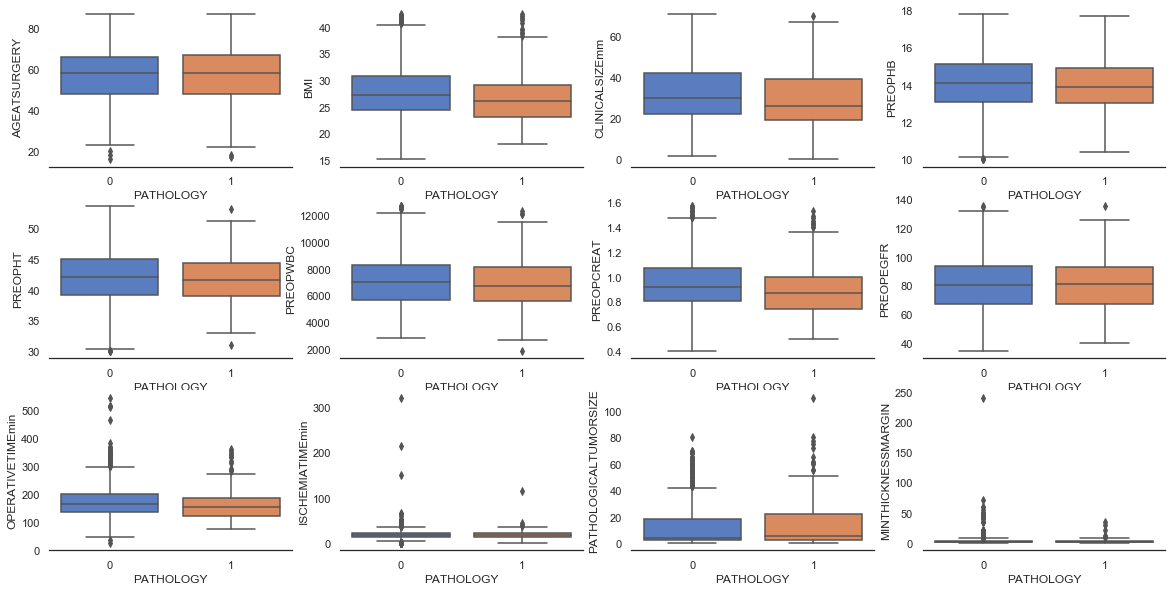

In [390]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)
f, axes = plt.subplots(3, 4, figsize=(20, 10))
sns.despine(left=True)
sns.boxplot(data = df, y = 'AGEATSURGERY', x = target,ax=axes[0, 0])
sns.boxplot(data = df, y = 'BMI', x = target, ax=axes[0, 1])
sns.boxplot(data = df, y = 'CLINICALSIZEmm', x = target, ax=axes[0, 2])
sns.boxplot(data = df, y = 'PREOPHB', x = target, ax=axes[0, 3])
sns.boxplot(data = df, y = 'PREOPHT', x = target, ax=axes[1, 0])
sns.boxplot(data = df, y = 'PREOPWBC', x = target, ax=axes[1, 1])
sns.boxplot(data = df, y = 'PREOPCREAT', x = target, ax=axes[1, 2])
sns.boxplot(data = df, y = 'PREOPEGFR', x = target, ax=axes[1, 3])
sns.boxplot(data = df, y = 'OPERATIVETIMEmin', x = target, ax=axes[2, 0])
sns.boxplot(data = df, y = 'ISCHEMIATIMEmin', x = target, ax=axes[2, 1])
sns.boxplot(data = df, y = 'PATHOLOGICALTUMORSIZE', x = target, ax=axes[2, 2])
sns.boxplot(data = df, y = 'MINTHICKNESSMARGIN', x = target, ax=axes[2, 3])

In [391]:
# Check the number of outliers
clean_cols = ['BMI','CLINICALSIZEmm','PREOPHB','PREOPHT',
              'PREOPWBC','PREOPCREAT','PREOPEGFR','OPERATIVETIMEmin',
              'ISCHEMIATIMEmin','PATHOLOGICALTUMORSIZE','MINTHICKNESSMARGIN']
for i in clean_cols:
    q1 = numeric_stats.loc['25%'][i]
    q3 = numeric_stats.loc['75%'][i]
    IQR = q3-q1
    LL = q1-(1.5*IQR)
    UL = q3+(1.5*IQR)
    print('{:<22s} {:>4d} {:>4d}'.format(i,len(df.loc[(df[i]>=UL)]),len(df.loc[(df[i]<=LL)])),
          'UL-LL {:>4.2f}-{:>4.2f}'.format(UL,LL))

BMI                      26    0 UL-LL 40.23-14.52
CLINICALSIZEmm            9    0 UL-LL 69.50--6.50
PREOPHB                   0    4 UL-LL 18.00-10.00
PREOPHT                   0    4 UL-LL 53.85-30.25
PREOPWBC                  8    0 UL-LL 12150.00-1830.00
PREOPCREAT               25    1 UL-LL 1.44-0.40
PREOPEGFR                 3    0 UL-LL 133.51-27.09
OPERATIVETIMEmin         50    1 UL-LL 297.00-33.00
ISCHEMIATIMEmin          53   80 UL-LL 36.50-0.50
PATHOLOGICALTUMORSIZE    78    0 UL-LL 46.25--23.75
MINTHICKNESSMARGIN       80    0 UL-LL 8.50--3.50


In [392]:
#replacing inaccurate readings with missing values
clean_cols = ['OPERATIVETIMEmin','ISCHEMIATIMEmin','PATHOLOGICALTUMORSIZE','MINTHICKNESSMARGIN']
for i in clean_cols:
    q1 = numeric_stats.loc['25%'][i]
    q3 = numeric_stats.loc['75%'][i]
    IQR = q3-q1
    LL = q1-(1.5*IQR)
    UL = q3+(1.5*IQR)
    df.drop(df.loc[(df[i]<=LL)|(df[i]>=UL),[i]].index, inplace=True)

In [393]:
df.describe()

,AGEATSURGERY,BMI,CLINICALSIZEmm,CHARLSONSCORE,PREOPHB,PREOPHT,PREOPWBC,PREOPCREAT,PREOPEGFR,LOCATIONTOPOLARLINE,NOOFLESIONS,OPERATIVETIMEmin,ISCHEMIATIMEmin,BLOODLOSSml,PATHOLOGICALTUMORSIZE,MINTHICKNESSMARGIN,PATHOLOGY
count,1332.000000,1250.000000,1294.000000,1277.000000,1301.000000,1300.000000,1159.000000,1322.000000,1073.000000,1183.000000,1314.000000,1259.000000,1247.000000,1300.000000,1318.000000,818.000000,1334.000000
mean,56.809309,27.423115,30.185781,1.168363,14.040784,41.913462,7057.357204,0.926581,80.835009,1.918005,1.046423,163.339952,18.681363,185.748462,10.656866,2.139242,0.193403
std,12.691140,4.750737,13.457351,1.707168,1.384429,4.113982,1848.118634,0.204624,18.669257,0.829371,0.256178,45.739990,6.322155,219.829069,12.386439,1.756656,0.395115
min,17.000000,15.100000,0.000000,0.000000,10.000000,30.000000,1840.000000,0.460000,34.000000,1.000000,0.000000,35.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,24.165000,20.000000,0.000000,13.100000,39.200000,5600.000000,0.780000,67.000000,1.000000,1.000000,128.000000,14.000000,50.000000,2.500000,1.000000,0.000000
50%,57.000000,26.790000,29.000000,1.000000,14.100000,42.100000,6900.000000,0.900000,80.170407,2.000000,1.000000,160.000000,18.000000,100.000000,4.000000,1.500000,0.000000
75%,66.000000,30.175000,40.000000,2.000000,15.100000,45.000000,8215.000000,1.050000,93.590000,3.000000,1.000000,190.000000,23.000000,200.000000,17.000000,3.000000,0.000000
max,87.000000,42.400000,71.000000,19.000000,17.800000,53.700000,12700.000000,1.570000,135.400000,3.000000,3.000000,296.000000,36.000000,2000.000000,46.000000,8.000000,1.000000


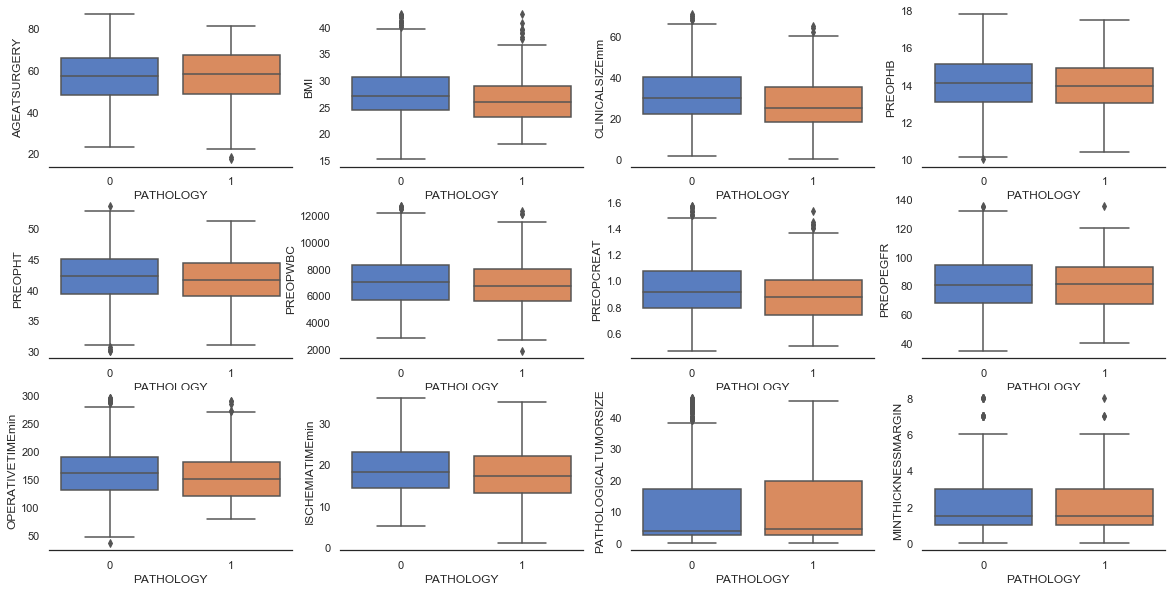

In [394]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)
f, axes = plt.subplots(3, 4, figsize=(20, 10))
sns.despine(left=True)
sns.boxplot(data = df, y = 'AGEATSURGERY', x = target,ax=axes[0, 0])
sns.boxplot(data = df, y = 'BMI', x = target, ax=axes[0, 1])
sns.boxplot(data = df, y = 'CLINICALSIZEmm', x = target, ax=axes[0, 2])
sns.boxplot(data = df, y = 'PREOPHB', x = target, ax=axes[0, 3])
sns.boxplot(data = df, y = 'PREOPHT', x = target, ax=axes[1, 0])
sns.boxplot(data = df, y = 'PREOPWBC', x = target, ax=axes[1, 1])
sns.boxplot(data = df, y = 'PREOPCREAT', x = target, ax=axes[1, 2])
sns.boxplot(data = df, y = 'PREOPEGFR', x = target, ax=axes[1, 3])
sns.boxplot(data = df, y = 'OPERATIVETIMEmin', x = target, ax=axes[2, 0])
sns.boxplot(data = df, y = 'ISCHEMIATIMEmin', x = target, ax=axes[2, 1])
sns.boxplot(data = df, y = 'PATHOLOGICALTUMORSIZE', x = target, ax=axes[2, 2])
sns.boxplot(data = df, y = 'MINTHICKNESSMARGIN', x = target, ax=axes[2, 3])

In [395]:
# The percentage of missing data
df.isnull().mean()

PATIENTNUMBER            0.000000
CENTERCODE               0.000000
GENDER                   0.000000
AGEATSURGERY             0.001499
MARITALSTATUS            0.109445
                           ...   
CLAVIENGRADE             0.000000
PATHOLOGICALTUMORSIZE    0.011994
MINTHICKNESSMARGIN       0.386807
MULITIFOCALITY           0.022489
PATHOLOGY                0.000000
Length: 70, dtype: float64

In [396]:
# Calculate number missing values per row
df.reset_index(inplace=True, drop=True)
missing = {}

for i in range(len(df)):
    miss_cnt = 0
    for col in df.columns:
        if pd.isna(df[col][i]) == True:
            miss_cnt = miss_cnt+1
    df.loc[i,'Missing'] = miss_cnt

In [397]:
# calculate number of records with over 25% missing data
print("Total Records {}".format(len(df)))
print("Records with >=25% missing data {}".format(sum(df['Missing']<= round((len(df.columns)-2)*.30))))
print("Records to be dropped {}".format(len(df) - sum(df['Missing']<= round((len(df.columns)-2)*.30))))

Total Records 1334
Records with >=25% missing data 1310
Records to be dropped 24


In [398]:
# Chekc the number of missing values for each variables if records with a certain missing threshold were removed
df[df['Missing']<= round((len(df.columns)-2)*.30) ].isnull().mean()

PATIENTNUMBER            0.000000
CENTERCODE               0.000000
GENDER                   0.000000
AGEATSURGERY             0.001527
MARITALSTATUS            0.095420
                           ...   
PATHOLOGICALTUMORSIZE    0.012214
MINTHICKNESSMARGIN       0.388550
MULITIFOCALITY           0.022901
PATHOLOGY                0.000000
Missing                  0.000000
Length: 71, dtype: float64

In [399]:
#removing patients with more than 70% missing data
df = df[df['Missing']<= round((len(df.columns)-2)*.30) ].copy()

In [400]:
df[df.columns[df.isnull().mean() <= 0.15]].isnull().mean()

PATIENTNUMBER            0.000000
CENTERCODE               0.000000
GENDER                   0.000000
AGEATSURGERY             0.001527
MARITALSTATUS            0.095420
                           ...   
CLAVIENGRADE             0.000000
PATHOLOGICALTUMORSIZE    0.012214
MULITIFOCALITY           0.022901
PATHOLOGY                0.000000
Missing                  0.000000
Length: 66, dtype: float64

In [401]:
df = df[df.columns[df.isnull().mean() <= 0.15]]

In [402]:
# Replcaing missing values in categorical column with NA
for k in cat_col:
    if k in df.columns:
        df[k].fillna('NA',inplace = True)

In [403]:
# Replacing missing values in numerical columns with their respective mean 
for k in numeric_col_list:
    if k in df.columns:
        df[k].fillna(round(df[k].mean()), inplace = True)

In [404]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1310 entries, 0 to 1333
Data columns (total 66 columns):
PATIENTNUMBER                         1310 non-null object
CENTERCODE                            1310 non-null object
GENDER                                1310 non-null object
AGEATSURGERY                          1310 non-null float64
MARITALSTATUS                         1310 non-null object
RACE                                  1310 non-null object
EDUCATION                             1310 non-null object
BMI                                   1310 non-null float64
CLINICALSIZEmm                        1310 non-null float64
CHARLSONSCORE                         1310 non-null float64
SYMPTOMS                              1310 non-null object
SOLITARYKIDNEY                        1310 non-null object
BILATERALITYOFTUMOR                   1310 non-null object
SIDEOFTUMOR                           1310 non-null object
SIDEOFSURGERY                         1310 non-null object
FACE

In [405]:
# check unique value in each column of type object
unique_count_list = {}

for k in cat_col:
    if k in df.columns:
        unique_count_list.update({k:len(df[k].unique())})

unique_count_list

{'CENTERCODE': 18,
 'GENDER': 2,
 'MARITALSTATUS': 5,
 'RACE': 5,
 'EDUCATION': 5,
 'SYMPTOMS': 4,
 'SOLITARYKIDNEY': 4,
 'BILATERALITYOFTUMOR': 3,
 'SIDEOFTUMOR': 4,
 'SIDEOFSURGERY': 2,
 'FACE': 3,
 'TUMORlOCATION': 6,
 'PADUARISK': 5,
 'POLARLOCATION': 3,
 'RIMLOCATION': 3,
 'RENALSINUS': 3,
 'EXOPHYTICRATE': 4,
 'CLINICALSIZEGROUP': 4,
 'CT': 6,
 'CN': 4,
 'R.E.N.A.L.NEPHRORISKSTRATIFICATION': 5,
 'RADIUSmaximaldiameterincm': 4,
 'NEARNESSOFTUMOUR': 4,
 'ANTERIORORPOSTERIOR': 4,
 'LOCATIONTOPOLARLINE': 4,
 'ASASCORE': 5,
 'PARTIALNEPHROINDICATION': 4,
 'MULTIFOCALITY': 3,
 'ACCESS': 3,
 'DAVINCIMODEL': 4,
 'ROBOTICSARMS': 3,
 'ASSISTENTTROCARS': 3,
 'DUALCONSOLE': 3,
 'ISCHEMIA': 4,
 'CLAMPARTERY': 4,
 'SELECTIVEARTERIALCLAMPING': 3,
 'CLAMPVEIN': 4,
 'EARLYUNCLAMPING': 3,
 'FLUORESCENCE': 3,
 'INNERRENORRHAPHY': 3,
 'OUTERRENORRHAPHY': 3,
 'UCSREPAIR': 3,
 'HAEMOSTATICAGENTS': 3,
 'LYMPHNODEDISSECTIONLND': 3,
 'INTRAOPTRANSUFUSION': 4,
 'INTRAOPCOMPLICATIONS': 7,
 'SURGICALCOMPLIC

In [406]:
# convert object columns with less than 10 unique values into type category
for col in unique_count_list:
        df[col] = df[col].astype('category').copy()

In [407]:
# list of features with object type
for col in unique_count_list:
    if unique_count_list[col]>10:
        print(col,unique_count_list[col])

CENTERCODE 18


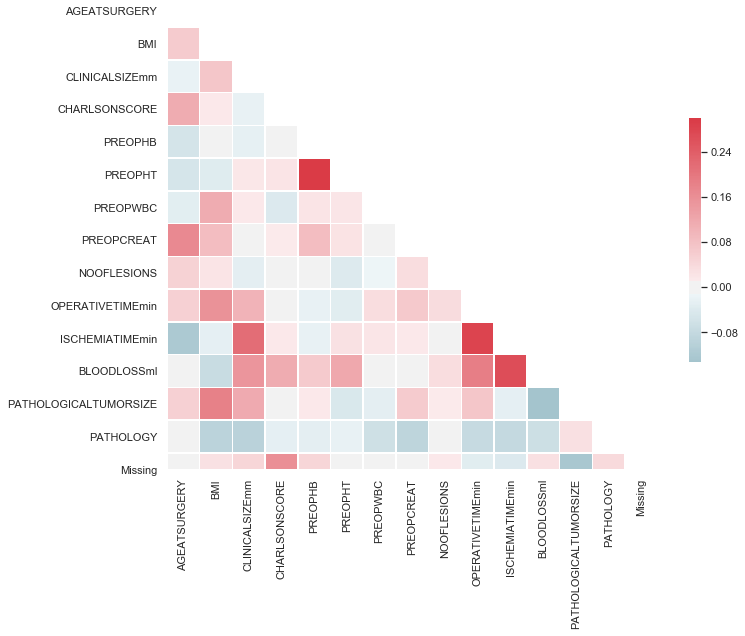

In [408]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [409]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1310 entries, 0 to 1333
Data columns (total 66 columns):
PATIENTNUMBER                         1310 non-null object
CENTERCODE                            1310 non-null category
GENDER                                1310 non-null category
AGEATSURGERY                          1310 non-null float64
MARITALSTATUS                         1310 non-null category
RACE                                  1310 non-null category
EDUCATION                             1310 non-null category
BMI                                   1310 non-null float64
CLINICALSIZEmm                        1310 non-null float64
CHARLSONSCORE                         1310 non-null float64
SYMPTOMS                              1310 non-null category
SOLITARYKIDNEY                        1310 non-null category
BILATERALITYOFTUMOR                   1310 non-null category
SIDEOFTUMOR                           1310 non-null category
SIDEOFSURGERY                         1310 no

In [410]:
df.reset_index(drop=True, inplace=True)
print("Number records for predicting 30 day complications: {}".format(len(df)))

Number records for predicting 30 day complications: 1310


In [411]:
for i in df.select_dtypes('category').columns:
    df[i] = df[i].apply(str)

In [412]:
# fit label encoder to each column of type category
cat_col =df.select_dtypes('category')
df_codes = df.copy()
from sklearn.preprocessing import LabelEncoder
le_dict = {col: LabelEncoder() for col in cat_col }
for col in cat_col:
    le_dict[col].fit_transform(df_codes[col])

In [413]:
# create a dictionary cantaining mapping of categorical values to numerical values
label_mapping = dict()
label_mapping = {col: dict(zip(le_dict[col].classes_,le_dict[col].transform(le_dict[col].classes_))) for col in cat_col}
label_mapping

{'CENTERCODE': {'08ZMCILJ': 0,
  '0VZRZWAI': 1,
  '39HIP3LQ': 2,
  '3QWOG020': 3,
  '4M49I4D5': 4,
  '4UPDM0XB': 5,
  '57T3OUKU': 6,
  '63DCGHNW': 7,
  '94ISQMHX': 8,
  'FWL0MH42': 9,
  'GCIEYK6L': 10,
  'GQHLD5Q4': 11,
  'QRJWT5QR': 12,
  'RETM03Y8': 13,
  'U5WT3NOY': 14,
  'VNO3BPES': 15,
  'VRVRQ639': 16,
  'WGC7XYXZ': 17},
 'GENDER': {'Female': 0, 'Male': 1},
 'MARITALSTATUS': {'Divorced': 0,
  'Married': 1,
  'NA': 2,
  'Single': 3,
  'Widowed': 4},
 'RACE': {'Black': 0,
  'Mongoloid/Asian': 1,
  'NA': 2,
  'Others': 3,
  'White/Caucasian': 4},
 'EDUCATION': {'Graduate': 0,
  'NA': 1,
  'Not Provided': 2,
  'Post Graduate': 3,
  'Upto High School': 4},
 'SYMPTOMS': {'Absent': 0,
  'Local Symptoms': 1,
  'NA': 2,
  'Systemic Symptoms': 3},
 'SOLITARYKIDNEY': {'NA': 0, 'No': 1, 'Yes': 2, 'no': 3},
 'BILATERALITYOFTUMOR': {'NA': 0, 'No': 1, 'Yes': 2},
 'SIDEOFTUMOR': {'Bilateral': 0, 'Left': 1, 'NA': 2, 'Right': 3},
 'SIDEOFSURGERY': {'Left': 0, 'Right': 1},
 'FACE': {'Anterior': 0, 

In [414]:
# mapping categorical column values to integer labels
for col in cat_col:
    df_codes[col] = le_dict[col].transform(df_codes[col]).copy()

In [415]:
df_codes.head()

,PATIENTNUMBER,CENTERCODE,GENDER,AGEATSURGERY,MARITALSTATUS,RACE,EDUCATION,BMI,CLINICALSIZEmm,CHARLSONSCORE,SYMPTOMS,SOLITARYKIDNEY,BILATERALITYOFTUMOR,SIDEOFTUMOR,SIDEOFSURGERY,FACE,TUMORlOCATION,PREOPHB,PREOPHT,PREOPWBC,PREOPCREAT,PADUARISK,POLARLOCATION,RIMLOCATION,RENALSINUS,EXOPHYTICRATE,CLINICALSIZEGROUP,CT,CN,R.E.N.A.L.NEPHRORISKSTRATIFICATION,RADIUSmaximaldiameterincm,NEARNESSOFTUMOUR,ANTERIORORPOSTERIOR,LOCATIONTOPOLARLINE,ASASCORE,PARTIALNEPHROINDICATION,MULTIFOCALITY,NOOFLESIONS,ACCESS,DAVINCIMODEL,ROBOTICSARMS,ASSISTENTTROCARS,DUALCONSOLE,OPERATIVETIMEmin,ISCHEMIA,CLAMPARTERY,SELECTIVEARTERIALCLAMPING,CLAMPVEIN,EARLYUNCLAMPING,FLUORESCENCE,INNERRENORRHAPHY,OUTERRENORRHAPHY,ISCHEMIATIMEmin,UCSREPAIR,HAEMOSTATICAGENTS,LYMPHNODEDISSECTIONLND,BLOODLOSSml,INTRAOPTRANSUFUSION,INTRAOPCOMPLICATIONS,SURGICALCOMPLICATIONS,NONSURGICALCOMPLICATIONS,CLAVIENGRADE,PATHOLOGICALTUMORSIZE,MULITIFOCALITY,PATHOLOGY,Missing
0,13PAT000522,0,1,61.0,1,1,0,25.10,33.0,0.0,0,2,1,1,0,0,0,12.3,39.4,5400.0,1.25,2,2,0,1,0,1,1,1,2,1,0,2,1,2,1,1,1.0,2,3,1,2,1,180.0,3,0,2,2,1,2,2,2,25.0,2,2,2,100.0,3,6,4,0,1,3.5,0,0,0.0
1,11PAT000166,1,1,56.0,1,1,2,23.36,30.0,0.0,0,1,1,1,0,0,0,10.2,36.4,5200.0,0.70,1,2,2,1,1,1,1,1,1,1,1,0,0,0,1,1,1.0,2,3,1,2,1,160.0,3,0,1,2,1,1,1,1,20.0,1,1,1,75.0,3,6,0,0,1,3.0,0,0,3.0
2,15PAT000088,15,0,44.0,3,4,2,29.30,57.0,0.0,1,1,1,1,0,2,2,13.5,41.3,6300.0,0.83,3,1,2,2,1,0,2,1,2,0,0,3,1,1,1,1,1.0,2,2,0,0,1,108.0,3,0,1,2,1,1,2,2,23.0,1,1,1,186.0,3,6,5,0,1,42.0,0,0,2.0
3,11PAT000124,1,0,63.0,1,1,2,32.02,30.0,1.0,0,1,1,3,1,2,0,12.4,36.5,9500.0,1.10,1,2,2,1,1,0,2,1,2,0,2,3,1,1,1,1,1.0,2,3,1,2,1,120.0,3,0,1,2,1,1,2,2,22.0,1,1,1,200.0,3,6,5,0,0,3.4,0,0,3.0
4,15PAT000080,15,1,63.0,3,4,2,25.08,37.0,2.0,0,1,1,3,1,2,4,14.4,42.7,5500.0,1.01,3,1,0,2,1,1,1,1,2,1,0,3,1,1,1,1,1.0,2,2,0,0,1,178.0,3,0,1,2,1,1,2,2,30.0,1,1,1,100.0,3,6,5,0,1,2.5,0,0,1.0


### Create Stats for dataset

In [416]:
# print median , IQR for numeric columns 
for i in df.columns:#['AGEATSURGERY','BMI','CLINICALSIZEmm','PREOPHB','PREOPHT','PREOPWBC','PREOPCREAT','PREOPEGFR','NOOFLESIONS']:
    if i in numeric_col_list:
        print(i, "{0:.1f} [{1:.1f}-{2:.1f}]".format(np.median(df[i]),np.percentile(df[i],25),np.percentile(df[i],75)))

AGEATSURGERY 57.0 [48.0-66.0]
BMI 27.0 [24.3-30.0]
CLINICALSIZEmm 30.0 [21.0-39.0]
CHARLSONSCORE 1.0 [0.0-2.0]
PREOPHB 14.0 [13.1-15.0]
PREOPHT 42.0 [39.5-45.0]
PREOPWBC 7057.0 [5800.0-8100.0]
PREOPCREAT 0.9 [0.8-1.1]
NOOFLESIONS 1.0 [1.0-1.0]
OPERATIVETIMEmin 160.0 [130.0-186.0]
ISCHEMIATIMEmin 18.0 [14.5-22.0]
BLOODLOSSml 100.0 [50.0-200.0]
PATHOLOGICALTUMORSIZE 4.0 [2.5-17.8]


In [417]:
for i in df_codes.columns:
    if i in cat_col:
        print(pd.DataFrame(df_codes[i].apply(lambda x: le_dict[i].inverse_transform([x])[0]).value_counts()))

          CENTERCODE
GCIEYK6L         361
63DCGHNW         174
4UPDM0XB         151
4M49I4D5         131
VNO3BPES         102
08ZMCILJ          68
U5WT3NOY          52
0VZRZWAI          47
QRJWT5QR          44
WGC7XYXZ          34
RETM03Y8          29
57T3OUKU          26
3QWOG020          25
GQHLD5Q4          24
FWL0MH42          15
VRVRQ639          14
39HIP3LQ           7
94ISQMHX           6
        GENDER
Male       855
Female     455
          MARITALSTATUS
Married             988
NA                  125
Single              118
Widowed              41
Divorced             38
                 RACE
White/Caucasian   695
Others            272
Mongoloid/Asian   173
NA                139
Black              31
                  EDUCATION
Not Provided            547
Graduate                278
Upto High School        181
NA                      179
Post Graduate           125
                   SYMPTOMS
Absent                 1034
Local Symptoms          225
NA                       30


In [418]:
#traget_stats = pd.merge(df_codes[['PATIENTNUMBER','POSTOP_COMPLICATIONS']],
#                        df_ori[['PATIENTNUMBER','SURGICALCOMPLICATIONS','NONSURGICALCOMPLICATIONS','CLAVIENGRADE','LENGTHOFSTAYdays']], 
#                        left_on='PATIENTNUMBER', 
#                        right_on='PATIENTNUMBER').copy()

In [419]:
#traget_stats['CLAVIENGRADE'].value_counts()

In [420]:
#traget_stats[traget_stats['POSTOP_COMPLICATIONS']==1]['CLAVIENGRADE'].value_counts()

In [421]:
#sum(traget_stats['LENGTHOFSTAYdays']>4)

In [422]:
print('Number of patients {}'.format(len(df_codes)))
print('% of patients with complications {:.2f}%'.format(sum(df_codes['PATHOLOGY'])/len(df_codes)*100))

Number of patients 1310
% of patients with complications 19.39%


In [423]:
# Split data in test and train
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_codes, test_size=0.30, random_state=42, stratify = df_codes['PATHOLOGY'])

In [424]:
# Percentage of complications in trainset
train['PATHOLOGY'].sum()/len(train)

0.1941112322791712

In [425]:
# Percentage of complications in testset
test['PATHOLOGY'].sum()/len(test)

0.19338422391857507

In [426]:
# define data output path
data_path = 'H:/RediMinds/VCQI/Pathology/Postoperative/'
import os
if not os.path.exists(data_path):
    os.makedirs(data_path)

In [427]:
df_codes.drop(labels=['Missing','PATIENTNUMBER'], axis='columns', inplace=True)
df_codes.to_csv(data_path+"VCQI_clean_pathology.csv",index=False)

In [428]:
patient_list_train = train['PATIENTNUMBER'].tolist()
patient_list_test = test['PATIENTNUMBER'].tolist()
from joblib import dump
dump(patient_list_train, output_path + 'patient_list_train.joblib')
dump(patient_list_test, output_path + 'patient_list_test.joblib')

['output/models/patient_list_test.joblib']

In [429]:
# Save train and test dataset

train.drop(labels=['Missing','PATIENTNUMBER'], axis='columns', inplace=True)
test.drop(labels=['Missing','PATIENTNUMBER'], axis='columns', inplace=True)
train.to_csv(data_path+"VCQI_clean_train_pathology.csv",index=False)
test.to_csv(data_path+"VCQI_clean_test_pathology.csv",index=False)

C:\Users\anubhav\Anaconda3\envs\Tensorflow\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [430]:
import pickle

cat_col = df.select_dtypes('category')

with open(output_path+'cat_col_pathology', 'wb') as fp:
    pickle.dump(cat_col.columns.to_list(), fp)